In [1]:
import hoopin

In [2]:
hoopin.scrape_data()

In [4]:
data = hoopin.load_data()
data.head(3)

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,Age,MOV,Pace,TS%,W,L,Year
0,0,1.0,Cleveland Cavaliers,82,242.4,39.0,83.5,0.468,11.3,30.6,...,15.7,20.4,106.9,25.4,5.38,95.7,0.590,51.0,31.0,2023
1,1,2.0,Miami Heat,82,241.5,40.1,83.2,0.482,13.1,35.8,...,15.7,20.0,109.8,27.7,-0.32,96.3,0.574,44.0,38.0,2023
2,2,3.0,Philadelphia 76ers,82,242.4,40.4,85.4,0.473,11.6,33.4,...,14.3,19.6,110.9,28.2,4.32,96.9,0.608,54.0,28.0,2023


In [5]:
selected_columns = ['3P%','2P%', 'AST','TRB','STL',"TS%", 'W', 'L']

hoopin.run_regression(data,selected_columns)

Mean Squared Error: 6.284591878260728e-29

Most important variables:
W      1.000000e+00
3P%    5.365335e-13
TS%    1.632655e-13
2P%    1.146860e-13
AST    2.463307e-15
TRB    2.307182e-15
STL    1.956768e-15
L      1.665335e-16
dtype: float64


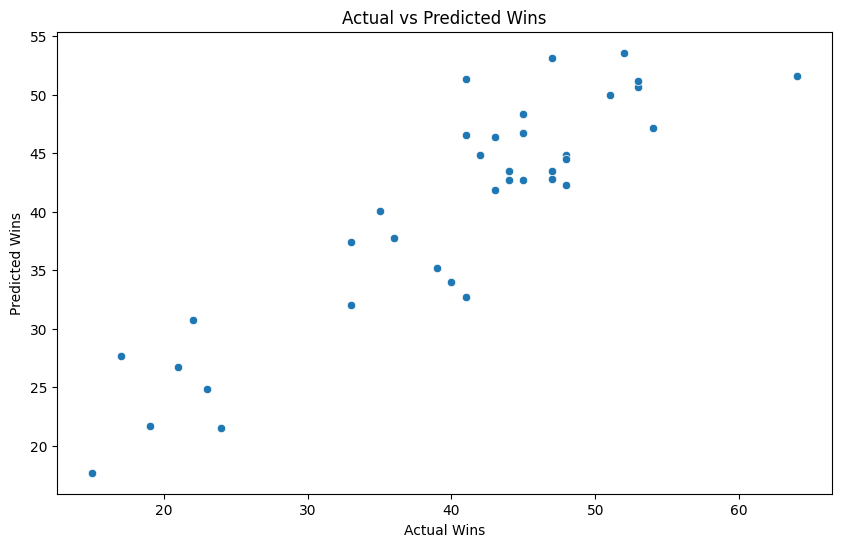

In [6]:
hoopin.show_actual_predicted()

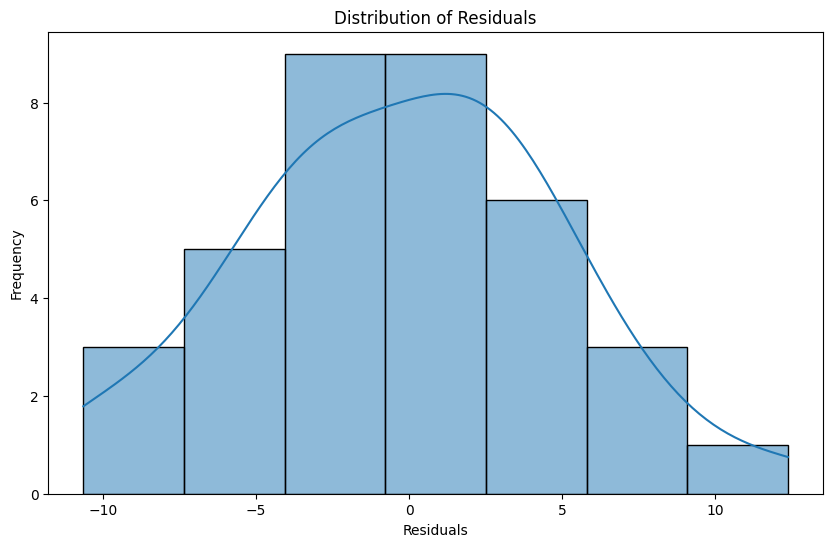

In [7]:
hoopin.show_residuals_distribution()

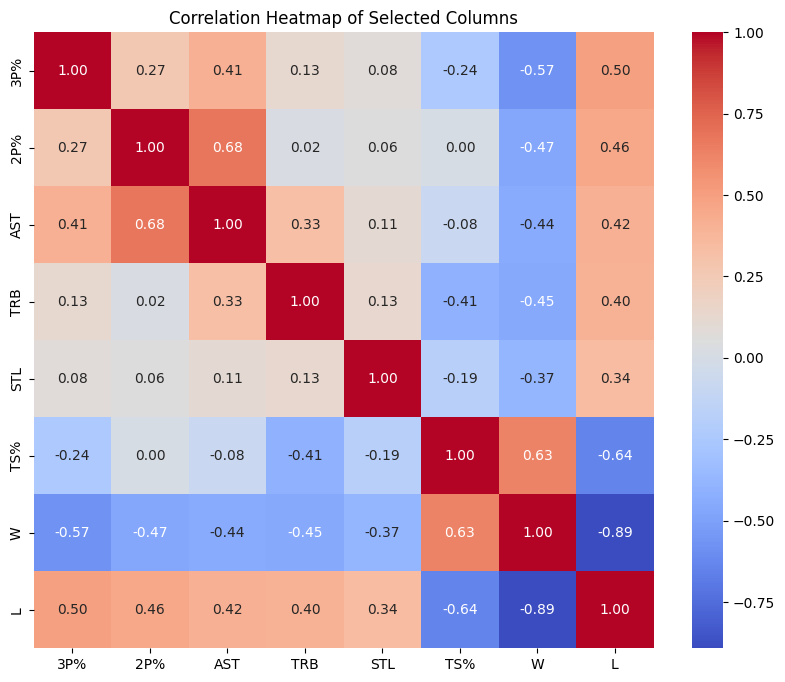

In [8]:
hoopin.show_correlation_heatmap()

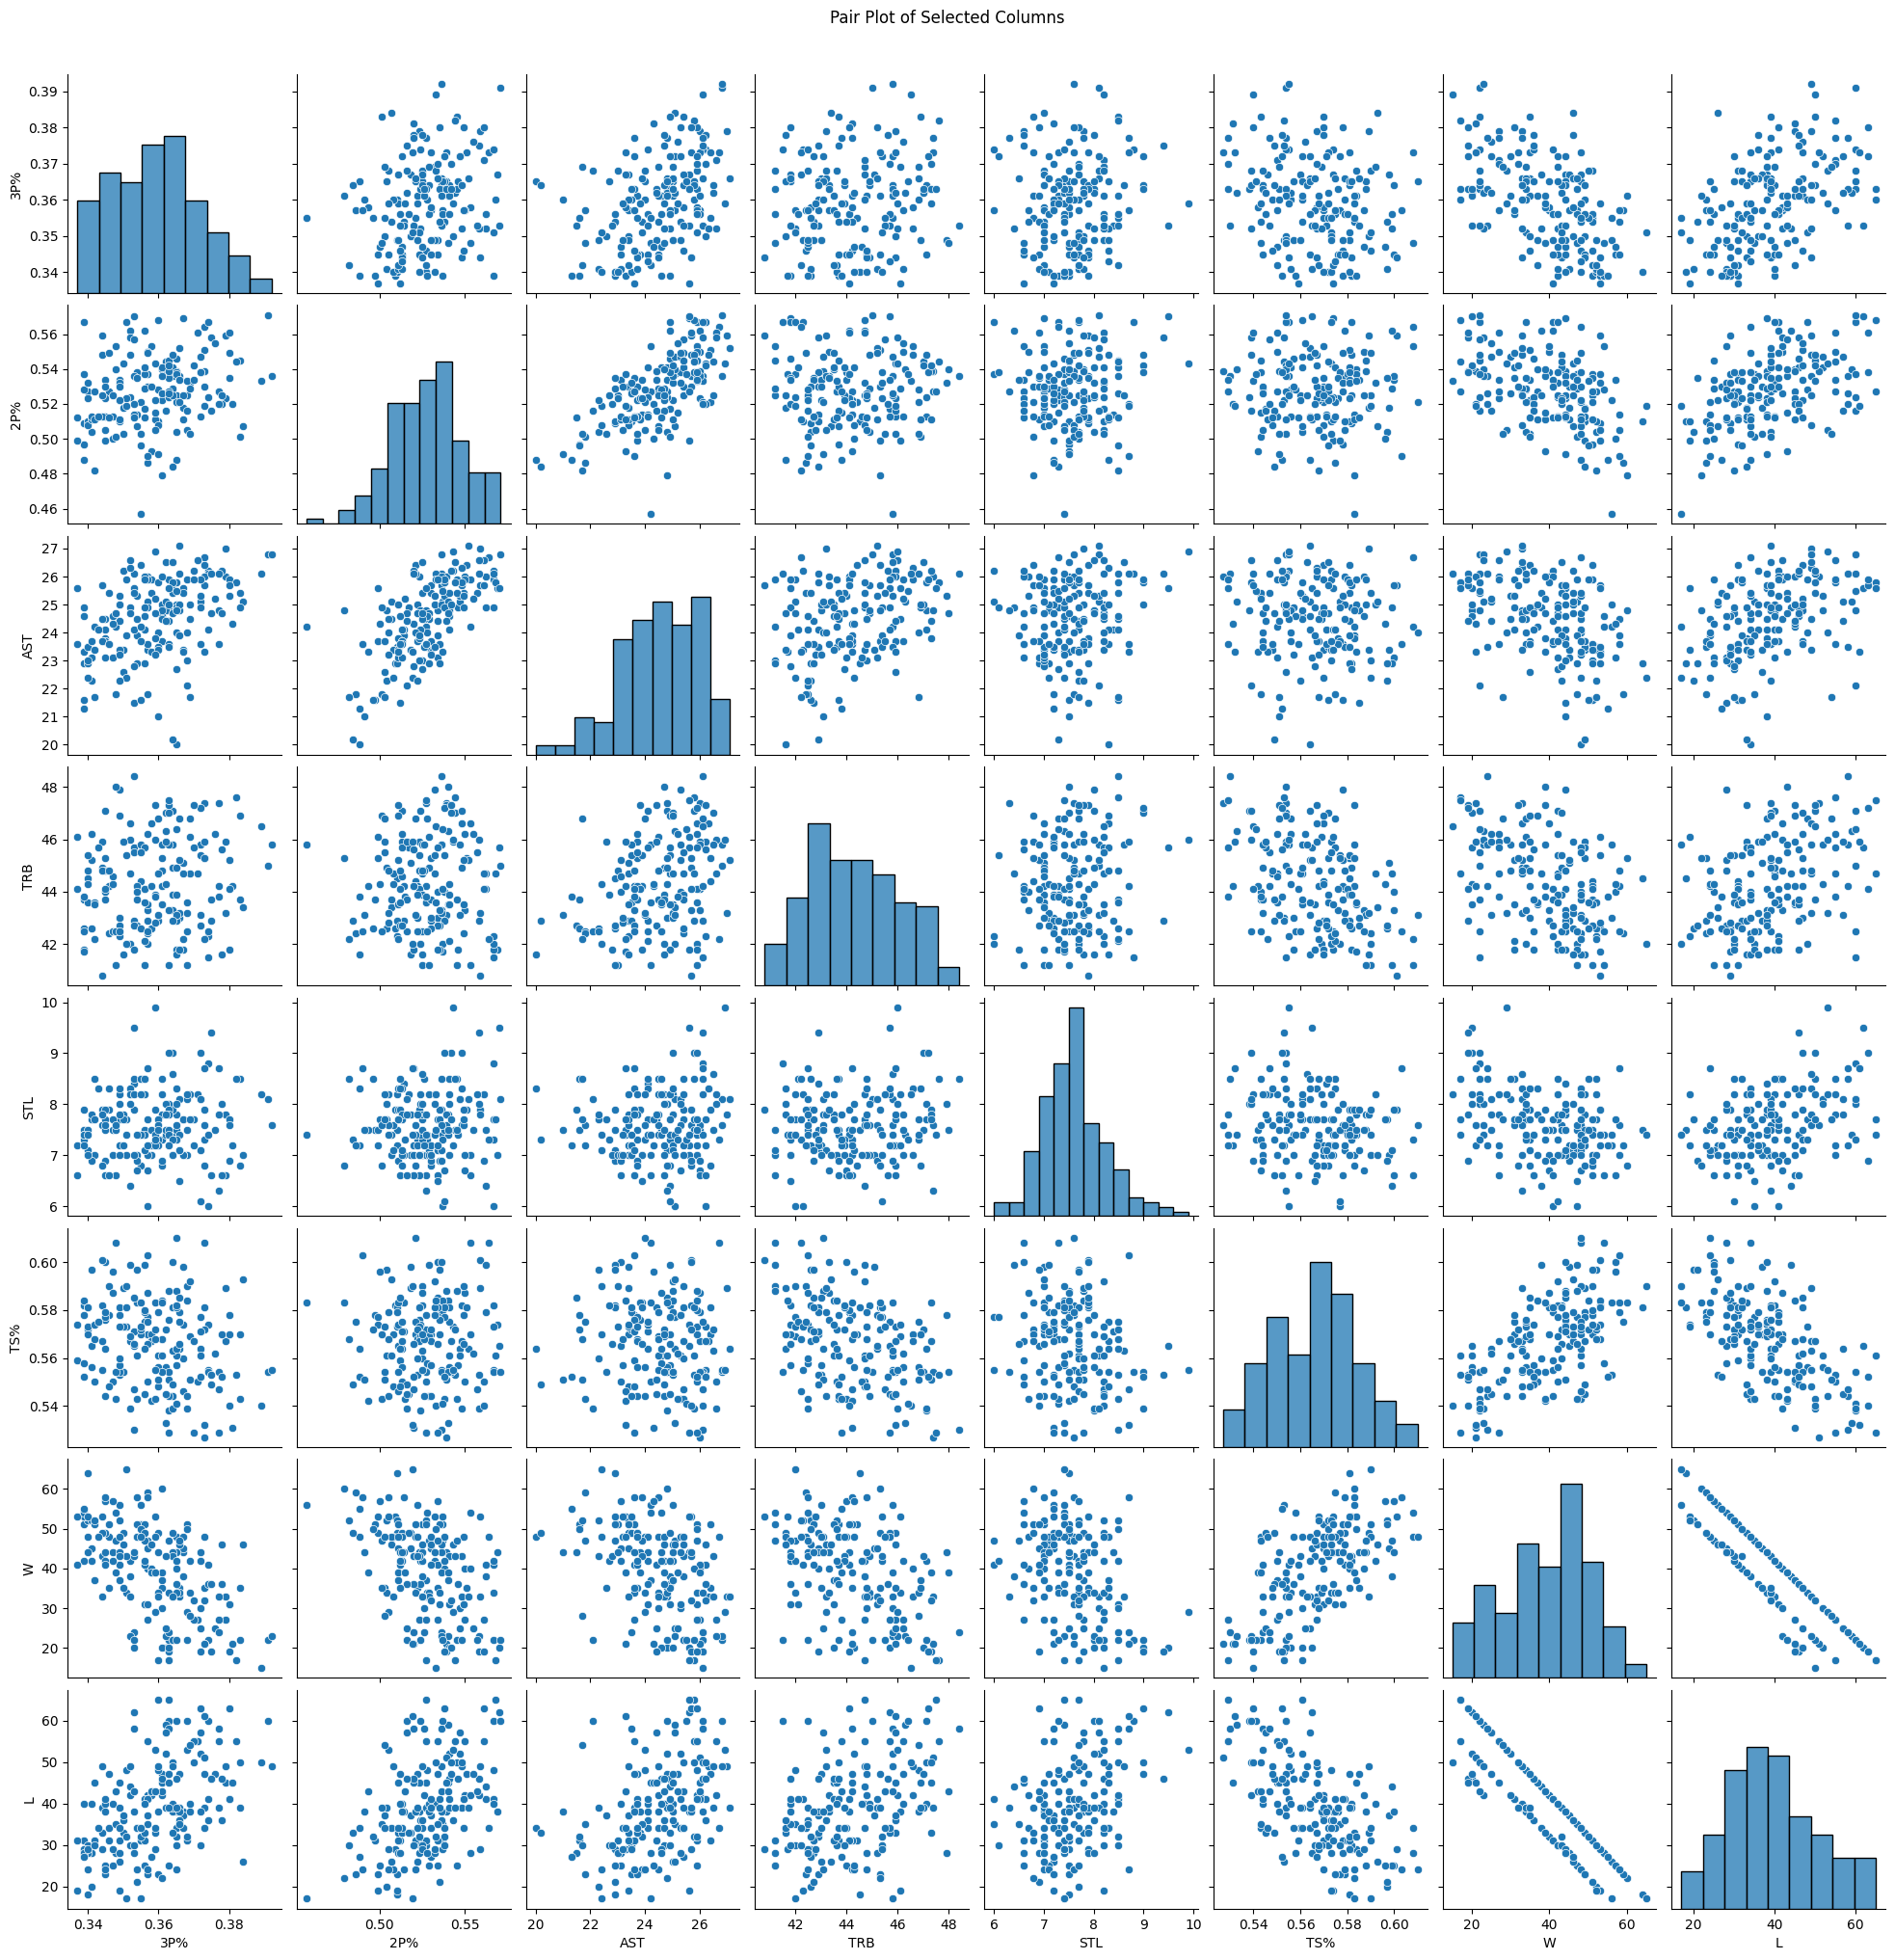

In [9]:
hoopin.show_pairplot()

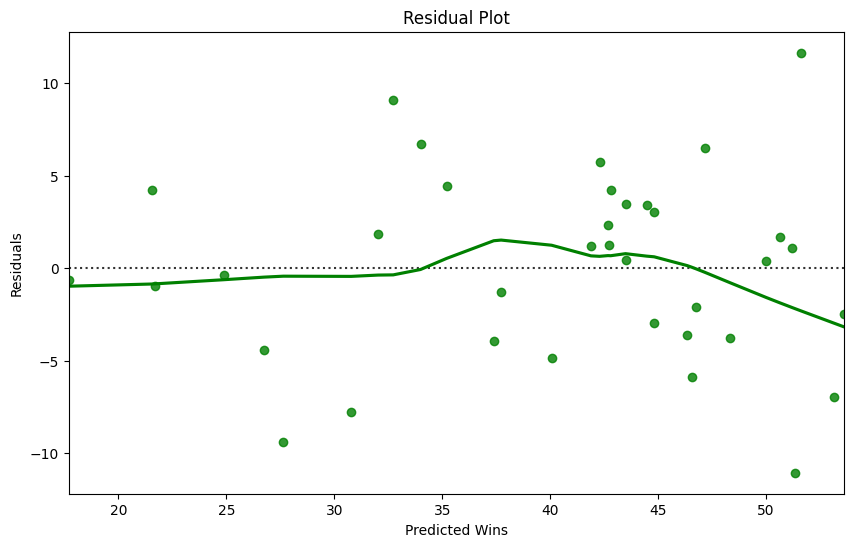

In [10]:
hoopin.show_residuals()

In [11]:
hoopin.show_MSE()


Mean Squared Error: 25.832318148950343


In [12]:
hoopin.show_r2()

R-squared: 0.8066905465130775
